# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier, export_text

# 2. Import data 

In [2]:
df = pd.read_csv('Breast_cancer_dataset.csv')
pd.set_option('display.max_columns', None)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Feature Categories:

The 30 features are grouped into three main categories based on the characteristics of cell nuclei:

Mean: Average values of measurements (e.g., mean radius, mean texture).  
Standard Error (SE): Variability of measurements (e.g., standard error of radius, standard error of area).  
Worst: Largest (worst) values of measurements (e.g., worst radius, worst smoothness).  

Each category includes 10 specific measurements:   

- Radius (mean of distances from center to points on the perimeter)  
- Texture (standard deviation of grayscale values)  
- Perimeter  
- Area  
- Smoothness (local variation in radius lengths)  
- Compactness (perimeter² / area - 1.0)  
- Concavity (severity of concave portions of the contour)  
- Concave points (number of concave portions of the contour)  
- Symmetry  
- Fractal dimension ("coastline approximation" - 1)  
- Diagnosis: The target variable, labeled as:  
    - M (Malignant): Indicates a cancerous tumor.  
    - B (Benign): Indicates a non-cancerous tumor.  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

There is no missing data 

# 3. Research questions and answers

Q1. What are the key medical predictors of breast cancer?  
-> All features except for 'fractal_dimension_mean', 'texture_se', and 'smoothness_se' are considered to have strong associations with breast cancer classification. Among these, 'concave points_mean', 'perimeter_worst', and 'radius_worst' are regarded as the most important predictors.

Q2. What values of the key medical predictors are associated with a higher likelihood of breast cancer?  
-> When concave points_mean is greater than 0.25 (original value: 0.0503) and perimeter_worst is greater than 0.32 (original value: 114.66), the likelihood of breast cancer is very high. Conversely, when concave points_mean is less than or equal to 0.25 and radius_worst is less than or equal to 0.32 (original value: 16.92), the tumor is very likely to be benign.

Q3. Can a predictive model be built to forecast the likelihood of having breast cancer based on the key medical predictors?  
-> Yes, predictive models such as decision trees and random forests have demonstrated high performance, achieving up to 96% accuracy in forecasting breast cancer likelihood based on the key predictors.

# 4. Preprocess data 

## 4-1. Remove unknown data

In [4]:
df = df.drop(columns = ['Unnamed: 32'])
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 4-2. Remove unnecessary data

In [5]:
df = df.drop(columns = ['id'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 4-3. Normalize data

In [6]:
scaler = MinMaxScaler()
cols_to_normalize = df.drop(columns = ['diagnosis']).columns
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,M,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,M,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,M,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,M,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


### 4-4. Add a diagnosis binary column

In [8]:
df['diagnosis_binary'] = df['diagnosis'].map({'B': 0, 'M': 1})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_binary
0,M,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,1
1,M,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,1
2,M,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,1
3,M,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,1
4,M,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,1


# 5. Assess outliers

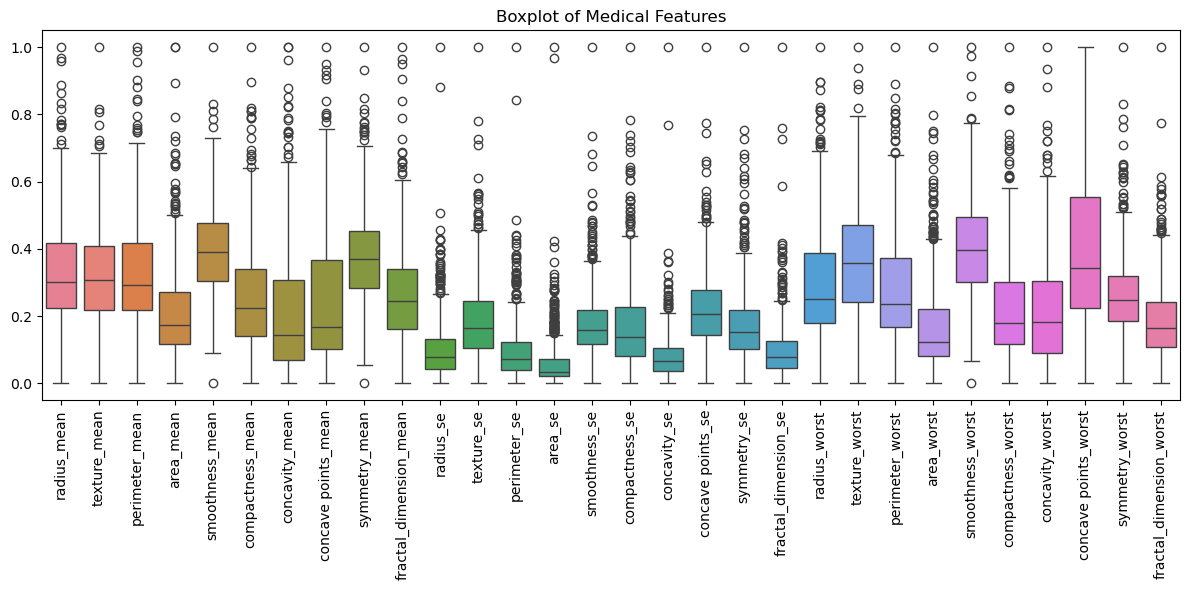

In [9]:
columns_no_target = df.drop(columns = ['diagnosis', 'diagnosis_binary']).columns

plt.figure(figsize = (12, 6))
sns.boxplot(data = df[columns_no_target])
plt.title("Boxplot of Medical Features")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

Do not remove outliers as the outliers can be significant indicators of breast cancer

# 6. Assess data normality (medical features vs breast cancer)

In [10]:
columns_no_target = df.drop(columns=['diagnosis', 'diagnosis_binary']).columns

results = []

for feature in columns_no_target:
    for diagnosis in df["diagnosis"].unique():
        data = df[df["diagnosis"] == diagnosis][feature].dropna()
        
        # Shapiro-Wilk normality test
        stat, p = shapiro(data)
        
        results.append({
            "Feature": feature,
            "diagnosis": diagnosis,
            "p-value": p,
            "Normal Distribution": "✅ Normal" if p >= 0.05 else "❌ Not Normal"
        })

result_df = pd.DataFrame(results)
result_df = result_df.sort_values(by=["diagnosis", "Feature"]).reset_index(drop=True)

print(result_df)

                    Feature diagnosis       p-value Normal Distribution
0                 area_mean         B  2.278843e-02        ❌ Not Normal
1                   area_se         B  6.757169e-15        ❌ Not Normal
2                area_worst         B  1.044692e-02        ❌ Not Normal
3          compactness_mean         B  2.643681e-12        ❌ Not Normal
4            compactness_se         B  1.274620e-21        ❌ Not Normal
5         compactness_worst         B  2.693842e-11        ❌ Not Normal
6       concave points_mean         B  4.803274e-10        ❌ Not Normal
7         concave points_se         B  2.816560e-17        ❌ Not Normal
8      concave points_worst         B  4.373887e-02        ❌ Not Normal
9            concavity_mean         B  2.245543e-23        ❌ Not Normal
10             concavity_se         B  1.093810e-29        ❌ Not Normal
11          concavity_worst         B  8.392743e-20        ❌ Not Normal
12   fractal_dimension_mean         B  1.446336e-15        ❌ Not

Based on the Shapiro-Wilk test, most features did not satisfy the normality assumption in either the Benign or Malignant classes (p > 0.05). A few features, such as perimeter_mean and radius_mean, showed normality in one class (p > 0.05) but not both. Therefore, due to the general violation of the normality assumption, the Mann-Whitney U test is more appropriate for comparing feature distributions between the two groups.

# 7. EDA

## 7-1. Medical features vs breast cancer (Mann-Whitney U test)

In [12]:
columns_no_target = df.drop(columns=['diagnosis', 'diagnosis_binary']).columns

benign = df[df['diagnosis'] == 'B']
malignant = df[df['diagnosis'] == 'M']

mw_test_results = {}

for feature in columns_no_target:

    benign_values = benign[feature].dropna()
    malignant_values = malignant[feature].dropna()
    
    stat, p_value = mannwhitneyu(benign_values, malignant_values, alternative='two-sided')
    
    mw_test_results[feature] = {'U-statistic': stat, 'p-value': p_value}
    
    print(f"\n Feature: {feature}")
    print(f"   U-statistic: {stat:.4f}")
    print(f"   p-value: {p_value:.4e}")

    if p_value < 0.05:
        print("   ✅ Statistically significant difference between Benign and Malignant classes.")
    else:
        print("   ❌ No statistically significant difference between Benign and Malignant classes.")
    print("--------------------------------------------------")


 Feature: radius_mean
   U-statistic: 4729.0000
   p-value: 2.6929e-68
   ✅ Statistically significant difference between Benign and Malignant classes.
--------------------------------------------------

 Feature: texture_mean
   U-statistic: 16966.5000
   p-value: 3.4286e-28
   ✅ Statistically significant difference between Benign and Malignant classes.
--------------------------------------------------

 Feature: perimeter_mean
   U-statistic: 4019.0000
   p-value: 3.5539e-71
   ✅ Statistically significant difference between Benign and Malignant classes.
--------------------------------------------------

 Feature: area_mean
   U-statistic: 4668.5000
   p-value: 1.5398e-68
   ✅ Statistically significant difference between Benign and Malignant classes.
--------------------------------------------------

 Feature: smoothness_mean
   U-statistic: 21037.0000
   p-value: 7.7930e-19
   ✅ Statistically significant difference between Benign and Malignant classes.
----------------------------

Besides fractal_dimension_mean, texture_se, smoothness_se, the other features showing statistically significant differences between benign and malignant cases based on the Mann-Whitney U test can be considered strongly associated with breast cancer classification. 

## 7-2-1. Correlations between mean medical features vs breast cancer (Heatmap)

In [13]:
mean_features = [col for col in df.columns if '_mean' in col]
mean_corr = df[mean_features + ['diagnosis_binary']].corr()

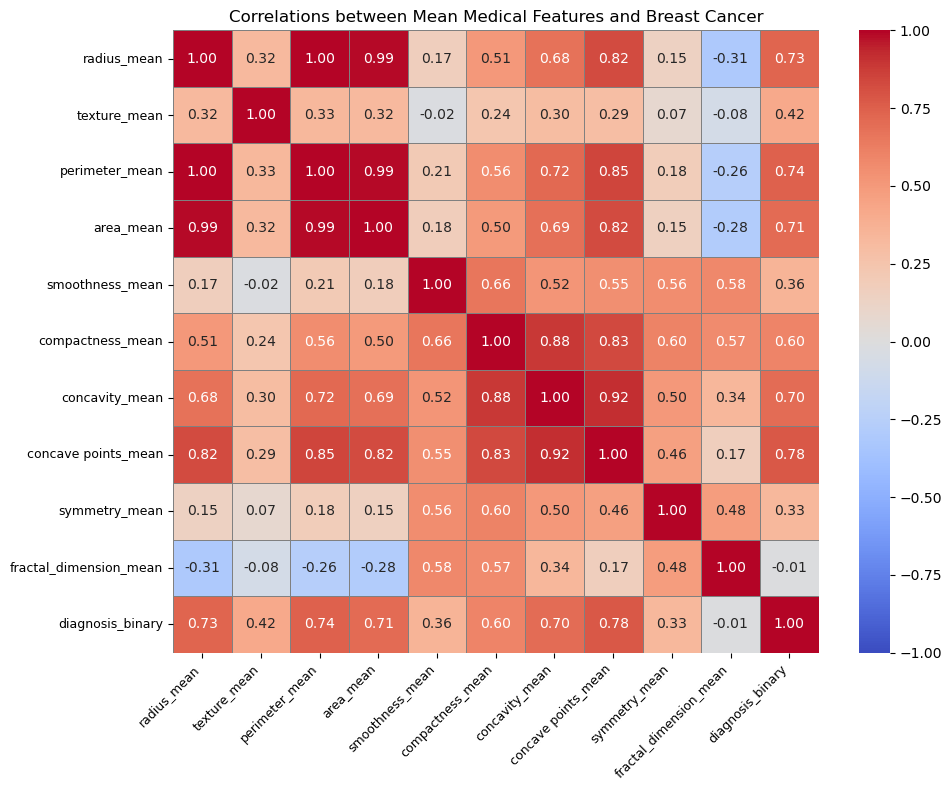

In [14]:
plt.figure(figsize = (10, 8))

sns.heatmap(
    mean_corr,
    annot = True,
    fmt = ".2f",
    cmap = "coolwarm",
    vmin = -1, vmax = 1,
    linewidths = 0.5,
    linecolor = "gray"
)

plt.title("Correlations between Mean Medical Features and Breast Cancer")
plt.xticks(rotation = 45, ha = "right", fontsize = 9)
plt.yticks(rotation = 0, fontsize = 9)
plt.tight_layout()
plt.show()

### Strong correlations (> 0.5)  

- radius: perimeter, area, compactness, concavity, concave points, diagnosis_binary  
- texture: x  
- perimeter: radius, perimeter, area, compactness, concavity, concave points, diagnosis_binary       
- area: radius, perimeter, compactness, concavity, concave points, diagnosis_binary     
- smoothness: compactness, concavity, concave points, symmetry, fractal_dimension      
- compactness: radius, perimeter, area, smoothness, concavity, concave points, symmetry, fractal_dimension, diagnosis_binary     
- concavity: radius, perimeter, area, smoothness, compactness, concave points, symmetry, diagnosis_binary    
- concave points: radius, perimeter, area, smoothness, compactness, concavity, diagnosis_binary
- symmetry: smoothness, compactness, concavity    
- fractal_dimension: smoothness, compactness    
- diagnosis_binary: radius, perimeter, area, compactness, concavity, concave points  

## 7-2-2. Correlations between standard error medical features vs breast cancer (Heatmap)

In [15]:
se_features = [col for col in df.columns if '_se' in col]
se_corr = df[se_features + ['diagnosis_binary']].corr()

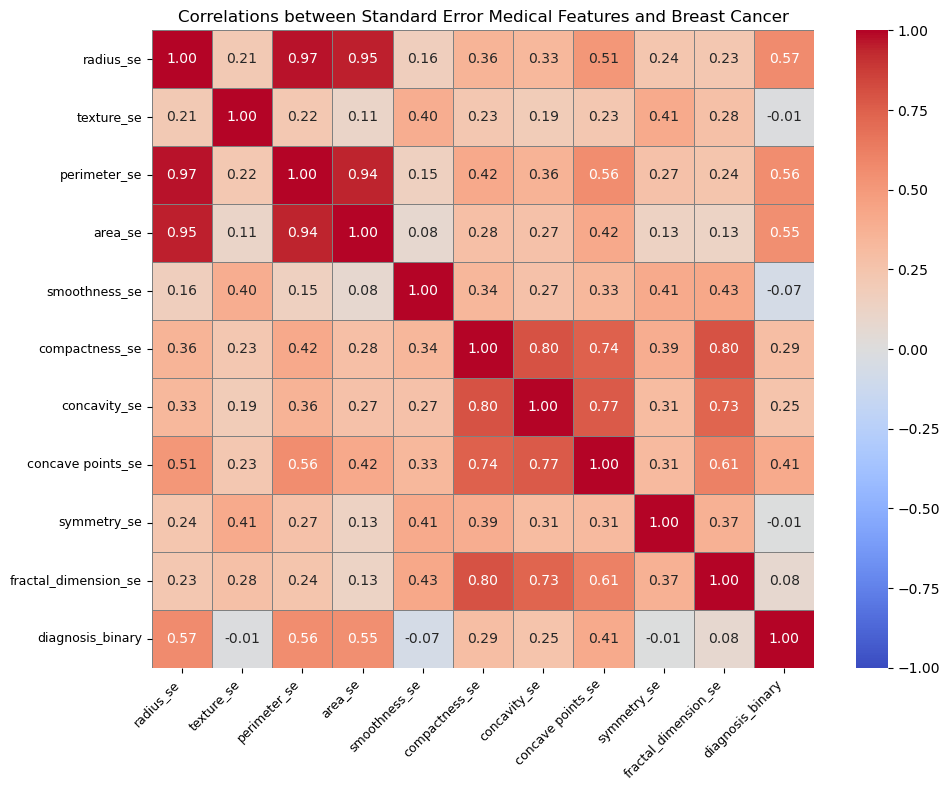

In [16]:
plt.figure(figsize = (10, 8))

sns.heatmap(
    se_corr,
    annot = True,
    fmt = ".2f",
    cmap = "coolwarm",
    vmin = -1, vmax = 1,
    linewidths = 0.5,
    linecolor = "gray"
)

plt.title("Correlations between Standard Error Medical Features and Breast Cancer")
plt.xticks(rotation = 45, ha = "right", fontsize = 9)
plt.yticks(rotation = 0, fontsize = 9)
plt.tight_layout()
plt.show()

### Strong correlations (> 0.5)  

- radius: perimeter, area, concave points, diagnosis_binary  
- texture: x  
- perimeter: radius, area, concave points, diagnosis_binary      
- area: radius, perimeter, diagnosis_binary     
- smoothness: x      
- compactness: concavity, concave points, fractal_dimension    
- concavity: compactness, concave points, fractal_dimension    
- concave points: radius, perimeter, compactness, concavity, fractal_dimension 
- symmetry: x
- fractal_dimension: compactness, concavity, concave points,    
- diagnosis_binary: radius, perimeter, area 

## 7-2-3. Correlations between worst medical features vs breast cancer (Heatmap)

In [17]:
worst_features = [col for col in df.columns if '_worst' in col]
worst_corr = df[worst_features + ['diagnosis_binary']].corr()

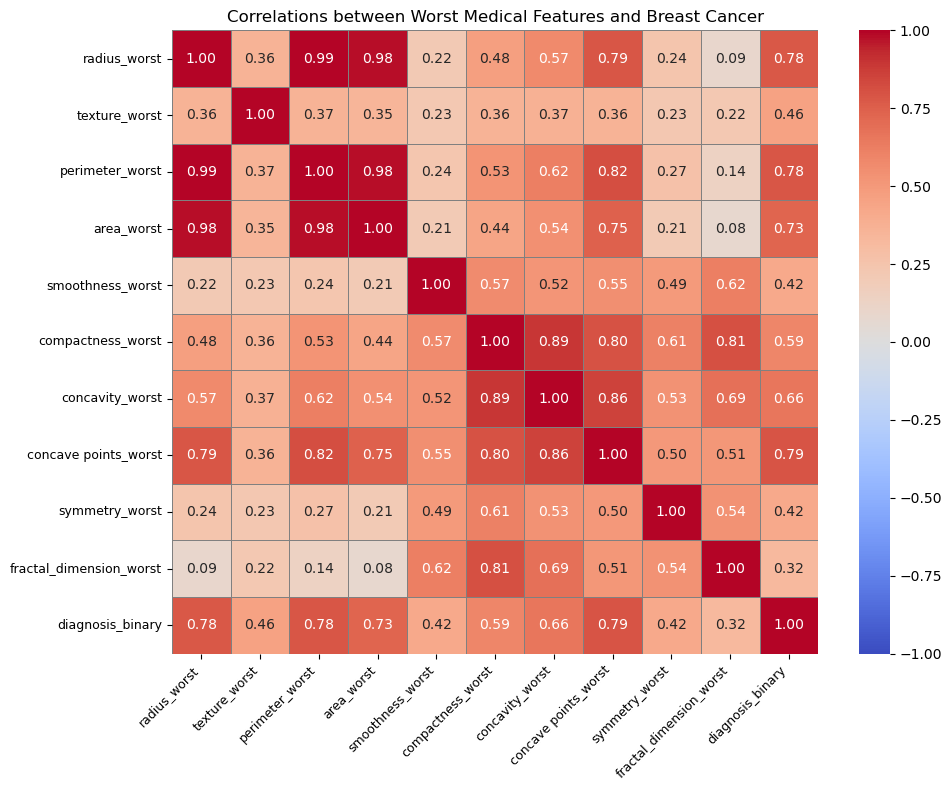

In [18]:
plt.figure(figsize = (10, 8))

sns.heatmap(
    worst_corr,
    annot = True,
    fmt = ".2f",
    cmap = "coolwarm",
    vmin = -1, vmax = 1,
    linewidths = 0.5,
    linecolor = "gray"
)

plt.title("Correlations between Worst Medical Features and Breast Cancer")
plt.xticks(rotation = 45, ha = "right", fontsize = 9)
plt.yticks(rotation = 0, fontsize = 9)
plt.tight_layout()
plt.show()

### Strong correlations (> 0.5)  

- radius: perimeter, area, concavity, concave points, diagnosis_binary  
- texture: x  
- perimeter: radius, perimeter, area, compactness, concavity, concave points, diagnosis_binary       
- area: radius, perimeter, concavity, concave points, diagnosis_binary     
- smoothness: compactness, concavity, concave points, fractal_dimension      
- compactness: smoothness, concavity, concave points, symmetry, fractal_dimension, diagnosis_binary     
- concavity: radius, perimeter, area, smoothness, compactness, concave points, symmetry, fractal_dimension, diagnosis_binary    
- concave points: radius, perimeter, area, smoothness, compactness, concavity, symmetry, fractal_dimension, diagnosis_binary
- symmetry: compactness, concavity, concave points, fractal_dimension      
- fractal_dimension: smoothness, compactness, concavity, concave points, symmetry     
- diagnosis_binary: radius, perimeter, area, compactness, concavity, concave points  

# 8. Develop classification / prediction models

## 8-1. Develop decision tree model

In [19]:
# Prepare training and test data 

X = df.drop(columns = ['diagnosis', 'diagnosis_binary', 'fractal_dimension_mean', 'texture_se', 'smoothness_se'])
y = df['diagnosis_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Apply SMOTE to address class imbalance

smote = SMOTE(random_state = 42, sampling_strategy = "auto")
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Make a decision tree model

dt_model = DecisionTreeClassifier(random_state = 42)

# Set parameters for GridSearchCV

param_grid = {
    "max_depth": [3, 5, 10, 15, 20],              
    "min_samples_split": [2, 5, 10, 15, 20],            
    "min_samples_leaf": [1, 2, 4, 8, 16],               
    "criterion": ["gini", "entropy"]            
}

# Make a GridSearchCV

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, 
                           cv = 3, n_jobs = 1, verbose = 0, scoring = "f1")

# Train the model

grid_search.fit(X_smote, y_smote)

# Check the best parameter

print("Best parameters found: ", grid_search.best_params_)

# Perform prediction with the best model

best_dt_model = grid_search.best_estimator_
y_pred = best_dt_model.predict(X_test)

# Check class imbalance (original y and y after smote)

print("Original class distribution (y):")
print(y.value_counts())
print("\nResampled class distribution (y_smote):")
print(y_smote.value_counts())

# Evaluate the model

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best parameters found:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 2}
Original class distribution (y):
diagnosis_binary
0    357
1    212
Name: count, dtype: int64

Resampled class distribution (y_smote):
diagnosis_binary
0    286
1    286
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



The best parameters were found to be {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 2}. To address class imbalance, SMOTE was applied to balance the sample sizes across classes. Features, except for 'fractal_dimension_mean', 'texture_se', and 'smoothness_se', were selected to predict the occurrence of breast cancer.

In [31]:
# model accuracy with train data

train_accuracy = accuracy_score(y_smote, best_dt_model.predict(X_smote))
train_f1 = f1_score(y_smote, best_rf_model.predict(X_smote))

# model accuracy with test data

test_accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training F1-Score: {train_f1:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")

Training Accuracy: 0.9720
Training F1-Score: 0.9930
Test Accuracy: 0.9649
Test F1-Score: 0.9535


## Critical values of key features

In [20]:
tree = DecisionTreeClassifier(
    criterion='entropy',         
    max_depth=3,
    min_samples_leaf=8,
    min_samples_split=2,
    random_state=42
)

tree.fit(X_train, y_train)

tree_rules = export_text(tree, feature_names=list(X.columns))

print(tree_rules)

|--- concave points_mean <= 0.25
|   |--- radius_worst <= 0.32
|   |   |--- area_se <= 0.05
|   |   |   |--- class: 0
|   |   |--- area_se >  0.05
|   |   |   |--- class: 0
|   |--- radius_worst >  0.32
|   |   |--- texture_worst <= 0.37
|   |   |   |--- class: 0
|   |   |--- texture_worst >  0.37
|   |   |   |--- class: 1
|--- concave points_mean >  0.25
|   |--- perimeter_worst <= 0.32
|   |   |--- texture_worst <= 0.36
|   |   |   |--- class: 0
|   |   |--- texture_worst >  0.36
|   |   |   |--- class: 1
|   |--- perimeter_worst >  0.32
|   |   |--- class: 1



In [21]:
threshold = 0.25 
feature_name = 'concave points_mean'

feature_columns = df.drop(columns=['diagnosis', 'diagnosis_binary']).columns

feature_index = list(feature_columns).index(feature_name)

fake_input = np.zeros((1, len(feature_columns)))
fake_input[0, feature_index] = threshold

original_input = scaler.inverse_transform(fake_input)
original_value = original_input[0, feature_index]

print(f"normalized value of'{feature_name}' {threshold} → original value: {original_value:.4f}")

normalized value of'concave points_mean' 0.25 → original value: 0.0503


In [22]:
threshold = 0.32 
feature_name = 'perimeter_worst'

feature_columns = df.drop(columns=['diagnosis', 'diagnosis_binary']).columns

feature_index = list(feature_columns).index(feature_name)

fake_input = np.zeros((1, len(feature_columns)))
fake_input[0, feature_index] = threshold

original_input = scaler.inverse_transform(fake_input)
original_value = original_input[0, feature_index]

print(f"normalized value of'{feature_name}' {threshold} → original value: {original_value:.4f}")

normalized value of'perimeter_worst' 0.32 → original value: 114.6628


In [23]:
threshold = 0.32 
feature_name = 'radius_worst'

feature_columns = df.drop(columns=['diagnosis', 'diagnosis_binary']).columns

feature_index = list(feature_columns).index(feature_name)

fake_input = np.zeros((1, len(feature_columns)))
fake_input[0, feature_index] = threshold

original_input = scaler.inverse_transform(fake_input)
original_value = original_input[0, feature_index]

print(f"normalized value of'{feature_name}' {threshold} → original value: {original_value:.4f}")

normalized value of'radius_worst' 0.32 → original value: 16.9252


- If concave points_mean is greater than 0.25 (original value : 0.0503) and perimeter_worst is greater than 0.32 (original valeu : 114.66), the likelihood of breast cancer is very high. 
- On the other hand, if concave points_mean is less than or equal to 0.25 (original value:0.0503) and radius_worst is also less than or equal to 0.32 (original value : 16.92), it is very likely that the tumor is benign.

In [24]:
df[df['diagnosis_binary'] == 1]['concave points_mean'].describe()

count    212.000000
mean       0.437326
std        0.170844
min        0.100944
25%        0.321173
50%        0.428827
75%        0.512798
max        1.000000
Name: concave points_mean, dtype: float64

In [25]:
df[df['diagnosis_binary'] == 1]['perimeter_worst'].describe()

count    212.000000
mean       0.453012
std        0.146706
min        0.172768
25%        0.343219
50%        0.436227
75%        0.544798
max        1.000000
Name: perimeter_worst, dtype: float64

In [26]:
df[df['diagnosis_binary'] == 1]['radius_worst'].describe()

count    212.000000
mean       0.469755
std        0.152386
min        0.174671
25%        0.348630
50%        0.450374
75%        0.564835
max        1.000000
Name: radius_worst, dtype: float64

## 8-2. Develop random forest model

In [27]:
# Prepare training and test data 

X = df.drop(columns = ['diagnosis', 'diagnosis_binary', 'fractal_dimension_mean', 'texture_se', 'smoothness_se'])
y = df['diagnosis_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Apply SMOTE to address class imbalance

smote = SMOTE(random_state = 42, sampling_strategy = 1)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Make a random forest model

rf_model = RandomForestClassifier(random_state = 42)

# Set parameters for GridSearchCV

param_grid = {
    "n_estimators": [10, 20, 30],                
    "max_depth": [5, 10, 20],                   
    "min_samples_split": [2, 3, 4],                        
    "min_samples_leaf": [2, 3, 4],                          
    "max_features": ["sqrt", "log2"],                                         
    "criterion": ["gini", "entropy"]                       
}

# Make a GridSearchCV

grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, 
                           cv = 3, n_jobs = 1, verbose = 0, scoring = "f1")

# Train the model

grid_search.fit(X_smote, y_smote)

# Check the best parameter

print("Best parameters found: ", grid_search.best_params_)

# Perform prediction with the best model

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Check class imbalance (original y and y after smote)

print("Original class distribution (y):")
print(y.value_counts())
print("\nResampled class distribution (y_smote):")
print(y_smote.value_counts())

# Evaluate the model

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 30}
Original class distribution (y):
diagnosis_binary
0    357
1    212
Name: count, dtype: int64

Resampled class distribution (y_smote):
diagnosis_binary
0    286
1    286
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



The best parameters were found to be {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 30}. To address class imbalance, SMOTE was applied to balance the sample sizes across classes. Features, except for 'fractal_dimension_mean', 'texture_se', and 'smoothness_se', were selected to predict the occurrence of breast cancer.

In [28]:
# Get feature importance from the best random forest model

feature_importance = best_rf_model.feature_importances_

# Create a DataFrame to display the feature importance

importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importance
})

# Sort the features by importance in descending order

importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Display the sorted feature importance

print("\nFeature Importance:")
print(importance_df)


Feature Importance:
                    Feature  Importance
19          perimeter_worst    0.141808
17             radius_worst    0.113677
24     concave points_worst    0.108359
23          concavity_worst    0.101223
20               area_worst    0.080129
7       concave points_mean    0.077409
6            concavity_mean    0.071380
0               radius_mean    0.044058
11                  area_se    0.036025
18            texture_worst    0.032064
2            perimeter_mean    0.028232
3                 area_mean    0.025165
9                 radius_se    0.023070
1              texture_mean    0.021930
21         smoothness_worst    0.018481
16     fractal_dimension_se    0.009963
5          compactness_mean    0.009289
25           symmetry_worst    0.009241
4           smoothness_mean    0.009062
22        compactness_worst    0.008950
15              symmetry_se    0.007267
13             concavity_se    0.005445
26  fractal_dimension_worst    0.005112
14        concave p

According to the feature importance, perimeter_worst (14.18%) and radius_worst (11.36%) are the two most influential predictors of breast cancer.

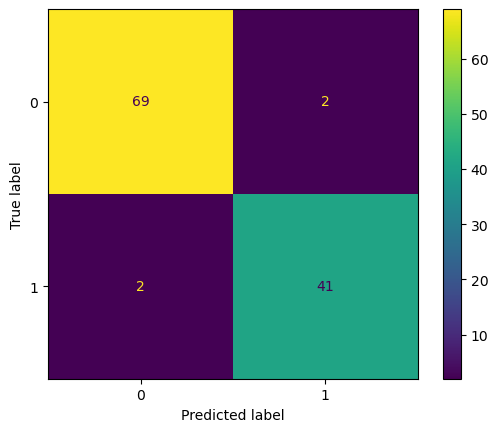

In [29]:
ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test, y_test)

### Non breast cancer (True label = 0):  
- Number of correct prediction: 69  
- Number of wrong prediction: 2  

### Breast cancer (True label = 1)  
- Number of correct prediction: 41  
- Number of wrong prediction: 2  

In [30]:
# model accuracy with train data

train_accuracy = accuracy_score(y_smote, best_rf_model.predict(X_smote))
train_f1 = f1_score(y_smote, best_rf_model.predict(X_smote))

# model accuracy with test data

test_accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training F1-Score: {train_f1:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")

Training Accuracy: 0.9930
Training F1-Score: 0.9930
Test Accuracy: 0.9649
Test F1-Score: 0.9535


To assess potential overfitting, the random forest model's accuracy and F1-score were evaluated on both the training and test datasets. Since the differences in both metrics are minimal, the model does not exhibit signs of overfitting.